<a href="https://colab.research.google.com/github/dlagur/rep4DL/blob/main/DL_using_IMDB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import keras
from keras.datasets import imdb
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=12000) # 가장 빈번하게 등장하는 단어의 숫자

In [2]:
x_train.shape, x_test.shape, type(x_train)

((25000,), (25000,), numpy.ndarray)

In [3]:
x_train[1]

[1,
 194,
 1153,
 194,
 8255,
 78,
 228,
 5,
 6,
 1463,
 4369,
 5012,
 134,
 26,
 4,
 715,
 8,
 118,
 1634,
 14,
 394,
 20,
 13,
 119,
 954,
 189,
 102,
 5,
 207,
 110,
 3103,
 21,
 14,
 69,
 188,
 8,
 30,
 23,
 7,
 4,
 249,
 126,
 93,
 4,
 114,
 9,
 2300,
 1523,
 5,
 647,
 4,
 116,
 9,
 35,
 8163,
 4,
 229,
 9,
 340,
 1322,
 4,
 118,
 9,
 4,
 130,
 4901,
 19,
 4,
 1002,
 5,
 89,
 29,
 952,
 46,
 37,
 4,
 455,
 9,
 45,
 43,
 38,
 1543,
 1905,
 398,
 4,
 1649,
 26,
 6853,
 5,
 163,
 11,
 3215,
 10156,
 4,
 1153,
 9,
 194,
 775,
 7,
 8255,
 11596,
 349,
 2637,
 148,
 605,
 2,
 8003,
 15,
 123,
 125,
 68,
 2,
 6853,
 15,
 349,
 165,
 4362,
 98,
 5,
 4,
 228,
 9,
 43,
 2,
 1157,
 15,
 299,
 120,
 5,
 120,
 174,
 11,
 220,
 175,
 136,
 50,
 9,
 4373,
 228,
 8255,
 5,
 2,
 656,
 245,
 2350,
 5,
 4,
 9837,
 131,
 152,
 491,
 18,
 2,
 32,
 7464,
 1212,
 14,
 9,
 6,
 371,
 78,
 22,
 625,
 64,
 1382,
 9,
 8,
 168,
 145,
 23,
 4,
 1690,
 15,
 16,
 4,
 1355,
 5,
 28,
 6,
 52,
 154,
 462,
 33,
 89,

## Review Decoding

In [4]:
# 라벨을 백업해서 벡터화한 이후 네트워크의 예측을 확인할 수 있다.
xtrain = x_train
xtest = x_test

In [5]:
word_index = imdb.get_word_index() # 단어 복원
reverse_word_index = dict([(value, key) for (key, value) in
                          word_index.items()]) # 저장소의 순서 역전

In [6]:
def decode_review(n, split='train'): # n: 데이터셋의 n번째 리뷰, 두번째 인자 : n번째 리뷰가 훈련/테스트 데이터?
    if split == 'train':
        decoded_review = ' '.join([reverse_word_index.get(i-3, '?') for i in xtrain[n]])
    elif split == 'test' :
        decoded_review = ' '.join([reverse_word_index.get(i-3, '?') for i in xtest[n]])
    return decoded_review 

In [7]:
print('Training label : ', y_train[5])
decode_review(5, split='train')

Training label :  0


"? begins better than it ends funny that the russian submarine crew ? all other actors it's like those scenes where documentary shots br br spoiler part the message ? was contrary to the whole story it just does not ? br br"

In [8]:
import numpy as np

def vectorize_features(features):

    # 단어 덩어리의 전체 단어 수를 정의
    # shape(25000, 12000)의 빈 2차원 텐서를 생성
    dimension = 12000
    review_vectors = np.zeros((len(features), dimension))

    # 각 리뷰에 대해 반복
    # 빈 텐서의 인덱스는 1로 설정
    for location, feature in enumerate(features):
        review_vectors[location, feature]=1
    return review_vectors

x_train = vectorize_features(x_train)
x_test = vectorize_features(x_test)


In [9]:
type(x_train), x_train.shape, y_train.shape

(numpy.ndarray, (25000, 12000), (25000,))

In [10]:
x_train[0].shape, x_train[0]

((12000,), array([0., 1., 1., ..., 0., 0., 0.]))

In [11]:
y_train = np.asarray(y_train).astype('float32')
y_test = np.asarray(y_test).astype('float32')

In [18]:
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(6, activation='relu', input_shape=(12000,)))
model.add(Dense(6, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [29]:
from keras import optimizers
model.compile(optimizer='rmsprop',
            loss = 'binary_crossentropy',
            metrics=['accuracy'])

In [30]:
network_metadata = model.fit(x_train, y_train,
                             validation_data=(x_test, y_test),
                             epochs=20,
                             batch_size=100)

Epoch 1/20
250/250 [==============================] - 7s 22ms/step - loss: 0.3650 - accuracy: 0.8619 - val_loss: 0.2851 - val_accuracy: 0.8850
Epoch 2/20
250/250 [==============================] - 5s 18ms/step - loss: 0.2078 - accuracy: 0.9226 - val_loss: 0.2869 - val_accuracy: 0.8838
Epoch 3/20
250/250 [==============================] - 4s 18ms/step - loss: 0.1674 - accuracy: 0.9390 - val_loss: 0.3257 - val_accuracy: 0.8738
Epoch 4/20
250/250 [==============================] - 4s 18ms/step - loss: 0.1440 - accuracy: 0.9480 - val_loss: 0.3348 - val_accuracy: 0.8758
Epoch 5/20
250/250 [==============================] - 4s 18ms/step - loss: 0.1246 - accuracy: 0.9565 - val_loss: 0.4031 - val_accuracy: 0.8605
Epoch 6/20
250/250 [==============================] - 5s 18ms/step - loss: 0.1111 - accuracy: 0.9611 - val_loss: 0.4059 - val_accuracy: 0.8646
Epoch 7/20
250/250 [==============================] - 4s 18ms/step - loss: 0.0992 - accuracy: 0.9663 - val_loss: 0.4604 - val_accuracy: 0.8566

In [39]:
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss')
network_metadata = model.fit(x_train, y_train,
                             validation_data=(x_test, y_test),
                             epochs=20,
                             batch_size=100,
                             callbacks=[early_stopping])

Epoch 1/20
250/250 [==============================] - 6s 23ms/step - loss: 0.0130 - accuracy: 0.9964 - val_loss: 1.2245 - val_accuracy: 0.8366
Epoch 2/20
250/250 [==============================] - 4s 18ms/step - loss: 0.0114 - accuracy: 0.9972 - val_loss: 1.2963 - val_accuracy: 0.8362


In [40]:
history_dict = network_metadata.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

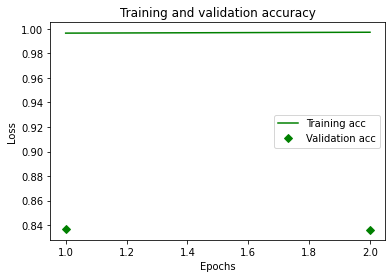

In [41]:
import matplotlib.pyplot as plt

plt.clf()

acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(acc_values) + 1)

plt.plot(epochs, history_dict.get('accuracy'), 'g', label='Training acc')
plt.plot(epochs, history_dict.get('val_accuracy'), 'gD', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [42]:
predictions = model.predict([x_test])
predictions[5]

array([0.9999963], dtype=float32)

In [43]:
y_test[5], decode_review(5, split='test')

(1.0,
 "? i'm absolutely disgusted this movie isn't being sold all who love this movie should email disney and increase the demand for it they'd eventually have to sell it then i'd buy copies for everybody i know everything and everybody in this movie did a good job and i haven't figured out why disney hasn't put this movie on dvd or on vhs in rental stores at least i haven't seen any copies this is a wicked good movie and should be seen by all the kids in the new generation don't get to see it and i think they should it should at least be put back on the channel this movie doesn't deserve a cheap download it deserves the real thing i'm them now this movie will be on dvd")

In [45]:
def gauge_predictions(n):
    if (predictions[n] <= 0.4) and (y_test[n] == 0):
        print('Network correctly predicts that review %d is negative' % (n))
    elif (predictions[n] <= 0.4) and (y_test[n] == 1):
        print('Network falsely predicts that review %d is negative' % (n))
    elif (predictions[n] >= 0.7) and (y_test[n] == 1):
        print('Network correctly predicts that review %d is positive' % (n))
    elif (predictions[n] >= 0.7) and (y_test[n] == 0):
        print('Network falsely predicts that review %d is positive' % (n))
    else:
        print('Network is not sure. Review no.%d has a probability score of' %(n),
              predictions[n])

def verify_predictions(n):
    return gauge_predictions(n), predictions[n], decode_review(n, split='test')
            

In [46]:
verify_predictions(22)

Network falsely predicts that review 22 is negative


(None,
 array([0.00015098], dtype=float32),
 "? how managed to avoid attention remains a mystery a potent mix of comedy and crime this one takes chances where tarantino plays it safe with the hollywood formula the risks don't always pay off one character in one sequence comes off ? silly and falls flat in the lead role thomas jane gives a wonderful and complex performance and two brief appearances by mickey rourke hint at the high potential of this much under and mis used actor here's a director one should keep one's eye on")

In [47]:
verify_predictions(19999)

Network correctly predicts that review 19999 is positive


(None,
 array([0.81936705], dtype=float32),
 "? this movies is really special it's about a young french who go in ? spain in order to study and in he meets other ? like him this film he's the european movies of the year so go watch it")

## 입력한 개수만큼의 리뷰를 무작위로 선택해서 결과를 예측

In [48]:
from random import randint

def random_predict(n_reviews):
    for i in range(n_reviews):
        print(verify_predictions(randint(0, 24000)))

random_predict(2)

Network correctly predicts that review 11648 is negative
(None, array([3.0892435e-05], dtype=float32), "? there is nothing in this that the viewer could point to and call good the acting was dull and ? the sets and cinematography look like they were developed by someone grew up in a ? and tried to make the perfect gap commercial characters have no drive motivation or reason for us to care about them there's such a lack of interest and tension that it's hard to follow the banal action and dialog and the plot if anyone finds it i'm sure it would be as boring as everything else br br this isn't funny it's not romantic it doesn't reflect on the human condition if you want a good ? comedy watch half baked if you want a good ? drama watch ? the only reason i gave this 2 stars instead of one is because it's kind of fun seeing some familiar faces in the mid late 90's cast which is a shallow reason to give the film even one star but then again this is a shallow movie")
Network correctly predict